In [1]:
# improving the algorithm
# https://machinelearningmastery.com/improve-deep-learning-performance/

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# file names
train_file = '/Users/VK/Dropbox/_Kaggle/WIDS_Stanford_2018/input/train.csv'
test_file = '/Users/VK/Dropbox/_Kaggle/WIDS_Stanford_2018/input/test.csv'

In [17]:
# input data
train = pd.read_csv(train_file, low_memory=False)
test = pd.read_csv(test_file, low_memory=False)

y_train = train.is_female  # y is the gender
test_id = test.test_id  # I need this for the submission

train = train.drop('train_id', 1)
test = test.drop('test_id', 1)
# train.columns.tolist()

In [8]:
train.head()  # this is what the first lines look like

,AA3,AA4,AA5,AA6,AA7,AA14,AA15,DG1,is_female,DG3,...,GN1,GN1_OTHERS,GN2,GN2_OTHERS,GN3,GN3_OTHERS,GN4,GN4_OTHERS,GN5,GN5_OTHERS
0,3,32,3.0,NaN,323011,3854,481,1975,1,3,...,99.0,NaN,99,NaN,99,NaN,99,NaN,99,NaN
1,2,26,NaN,8.0,268131,2441,344,1981,1,8,...,NaN,NaN,1,NaN,2,NaN,2,NaN,2,NaN
2,1,16,NaN,7.0,167581,754,143,1995,1,3,...,1.0,NaN,2,NaN,2,NaN,2,NaN,2,NaN
3,4,44,5.0,NaN,445071,5705,604,1980,1,3,...,NaN,NaN,2,NaN,2,NaN,99,NaN,99,NaN
4,4,43,NaN,6.0,436161,5645,592,1958,1,3,...,NaN,NaN,1,NaN,1,NaN,1,NaN,1,NaN


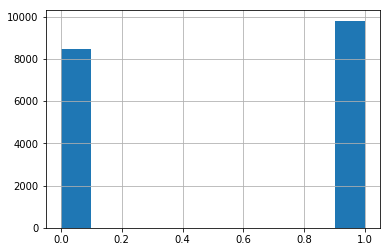

In [9]:
y_train.hist()
# 10k females vs 8k+ male. No other values. 

In [10]:
def show_missing():
    missing = train.columns[train.isnull().any()].tolist()
    return missing

train[show_missing()].isnull().sum()

AA5                 12602
AA6                  5653
DG3A_OTHERS         18205
DG4_OTHERS          18255
DG9a                  232
DG9b                10018
DG9c                11451
DG10b               10018
DG10c               11451
DG11b               11678
DG11c               12862
DG12B_1             12002
DG12B_2             12002
DG12C_1             13158
DG12C_2             13158
DG13_1              14691
DG13_2              14691
DG13_3              14691
DG13_4              14691
DG13_5              14691
DG13_96             14691
DG13_7              14691
DG13_OTHERS         18246
DG14                17508
DG14_OTHERS         18222
DL1_OTHERS          17974
DL2                  9257
DL2_23_OTHERS       18153
DL2_96_OTHERS       18021
DL3                  9257
                    ...  
FB26_10              9917
FB26_11              9917
FB26_96              9917
FB26_99              9917
FB26_OTHERS         18228
FB27_OTHERS         18248
FB28_1              17910
FB28_2      

In [18]:
# After running the show_missing I del the columns that have 60% missing values = nan. 
# => Out of total 18k values we drop the features with up to 12k missing variables. 
print (train.shape) # this shows how many features we had
train = train.dropna(thresh=12000, axis=1);
print (train.shape)   # this shows how many features we kept 
# in this case we deleted 1234-290 = 944 features

(18255, 1234)
(18255, 290)


In [13]:
def show_missing():
    missing = train.columns[train.isnull().any()].tolist()
    return missing

train[show_missing()].isnull().sum()

# This is how many missing values have the remaining features.

AA6         5653
DG9a         232
MT1A         757
MT17_1      6173
MT17_2      6173
MT17_3      6173
MT17_4      6173
MT17_5      6173
MT17_6      6173
MT17_7      6173
MT17_8      6173
MT17_9      6173
MT17_10     6173
MT17_11     6173
MT17_12     6173
MT17_13     6173
MT18_1      6173
MT18_2      6173
MT18_3      6173
MT18_4      6173
MT18_5      6173
MT18_6      6173
MT18_96     6173
MT18_8      6173
MM3_1         86
MM3_2        425
MM3_3         37
MM3_4         11
MM3_5          6
MM3_6         47
MM3_7         21
MM3_8         21
MM3_9         10
MM3_10         7
MM3_11        34
MM3_12        20
MM3_13       159
MM3_14        16
IFI16_1     2129
IFI16_2     5293
IFI17_1     2129
IFI17_2     5293
FL9B        4049
FB19B_1      769
FB19B_2      444
FB19B_3      297
FB19B_4      247
FB19B_5      263
FB19B_96      63
FB20        1494
FB24        5541
GN1         4025
dtype: int64

In [19]:
# Quick and dirty - nan to zero

train = train.fillna(0)
test = test.fillna(0)

# I tried filling nan with -1 & it did not improve the accuracy
# filling with mean produced much worse performance on random forest classifier

# KNN score 0.88999 if fillna (0)
# KNN score 0.54 if fillna (mean)

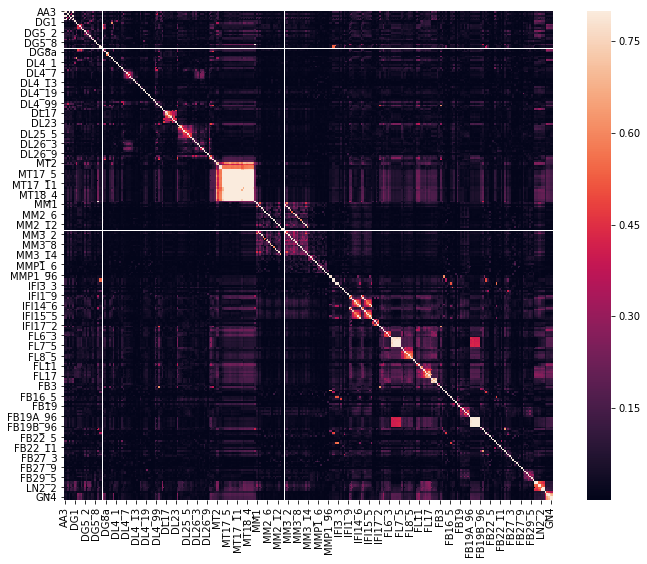

In [21]:
corrmat = train.corr().abs()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

# LATER: Del both white and black pairs of correlated features
# MT10 - MT18 - are correlated.

In [22]:
# From the list of features with missing values I noted that M17 & M18 columns have same number of missing values
# The also have strong correlation to each other as you can see further
# And the questions are really about two topics so I kept only two features and deleted the rest

d_col =['MT17_2', 'MT17_3', 'MT17_4', 'MT17_5', 'MT17_6', 'MT17_7', 'MT17_8', 'MT17_9', 'MT17_10', 'MT17_11', 'MT17_12', 'MT17_13', 'MT18_2', 'MT18_3', 'MT18_4', 'MT18_5', 'MT18_6', 'MT18_96', 'MT18_8']

train = train.drop(d_col, 1)
test = test.drop(d_col, 1)

In [23]:
# once Im done w correlations - remove y from X

train = train.drop('is_female', 1)
use_columns = train.columns.tolist();
test = test [use_columns]
dfid = pd.DataFrame(test_id, columns=['test_id'])

print (test.shape)

(27285, 270)


In [ ]:
# SCALING & 70/30 train/validation split

In [24]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing.data import QuantileTransformer

# I tried Standard Scaler, but MinMax has better improvement of accuracy for most classifiers, and is especially good 
# for neural nets
# MinMaxScaler (0,1) improved KNN from 58% to 76%

scaler = MinMaxScaler()
X_train = scaler.fit_transform(train)  # here I train the scaler & transform the train at the same call of function
X_test = scaler.transform(test)  # same scaler is used for test data

# Split train data to get validation data 70%/30%
from sklearn.model_selection import train_test_split
X70, X30, y70, y30 = train_test_split(X_train, y_train, test_size = 0.3, random_state = 111)

In [61]:
# Lets try various classifiers 

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

In [26]:
# various classifiers to try from Scikit-Learn

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis



In [28]:
h = .02  # step size in the mesh

names = ["Nearest Neighbors", 
    "Linear SVM", # "RBF SVM",  "Gaussian Process",
    "Decision Tree", "Random Forest", "Neural Net MLP", "AdaBoost",
    "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(n_neighbors=40, algorithm = 'auto', n_jobs =-1), # optimized HP but accuracy stuck at 76%
    SVC(kernel="linear", C=0.025),
    # SVC(gamma=2, C=1),  # this was taking too much time to compute
    # GaussianProcessClassifier(1.0 * RBF(1.0)),    # this was taking too much time to compute
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(n_estimators=350, max_depth=20, max_features=26, random_state=1234),  # optimized HP
    MLPClassifier(hidden_layer_sizes=(50,), learning_rate = 'adaptive', activation='relu', max_iter=500, alpha=0.0001, solver='adam', random_state=1234),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

# Work on data until the accuracy is more or less ok
# Then work on hyperparameter optimization
# After that, run these models with hyperparameter last time to finally select the models for stacking

In [15]:
for name, clf in zip(names, classifiers):
        clf.fit(X70, y70)
        score = clf.score(X30, y30)
        print (name, score)

Linear SVM 0.819426693445
Decision Tree 0.885521270769
Random Forest 0.902318787657
Neural Net MLP 0.836224210334
AdaBoost 0.899214898667
Naive Bayes 0.702026656929
QDA 0.528026291766


C:\Users\Constanta\Anaconda3\envs\py36\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [ ]:
''' 
Results of various combinations of data preprocessing:

MinMax w/o PCA + remove correlated features M17-18 

Nearest Neighbors 0.758444403871
Linear SVM 0.819426693445
        RBF SVM 0.538068285558
Decision Tree 0.885521270769
        Random Forest 0.665327734161
Neural Net 0.836224210334
AdaBoost 0.899214898667
    Naive Bayes 0.702026656929
        QDA 0.528026291766

MinMax + remove correlated features M18-18

Nearest Neighbors 0.707869271499
Linear SVM 0.713711886069
RBF SVM 0.681029760818
Decision Tree 0.666605806098
Random Forest 0.683951068103
Neural Net 0.720832572576
AdaBoost 0.700200839876
Naive Bayes 0.702209238634
QDA 0.702209238634


Min Max Scaler the same as MinMax(StandardScaler) - ie combination of scalers

Nearest Neighbors 0.655468322074
Linear SVM 0.690524009494
RBF SVM 0.674274237721

Decision Tree 0.667153551214
Random Forest 0.671535512142
Neural Net 0.696731787475
AdaBoost 0.687602702209
Naive Bayes 0.685776885156
QDA 0.675369727953
'''

'''
Standard Scaler
Nearest Neighbors 0.622786196823
Linear SVM 0.645243746577
RBF SVM 0.550301259814
Decision Tree 0.649990870915
Random Forest 0.646521818514
Neural Net 0.662406426876
AdaBoost 0.640314040533
Naive Bayes 0.626072667519
QDA 0.628628811393
'''

'''
Normalizer
Nearest Neighbors 0.572028482746
Linear SVM 0.533503742925
RBF SVM 0.537703122147
Decision Tree 0.58864341793
Random Forest 0.591929888625
Neural Net 0.533503742925
AdaBoost 0.58590469235
Naive Bayes 0.562716815775
QDA 0.579514332664
'''

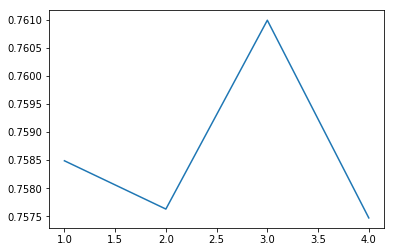

[0.75848866951334437, 0.7576283167093516, 0.76099227722967577, 0.75747059727586485]


In [90]:
# lets find the best params of KNN
# WOW. Rescaling the data improved the accuracy from 58% to 76%

kn = range(30,50,5)  # it seems that 40 is the best
# kn =  ['auto', 'ball_tree', 'kd_tree', 'brute']  # make no difference same accuracy
cv_scores = []
for k in kn:
    knn = KNeighborsClassifier(n_neighbors=k, algorithm = 'auto', n_jobs =-1)  #n_jobs=num of CPU cores to use.
    scores = cross_val_score(knn, X70, y70, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    
plt.plot(kn, cv_scores)
plt.show()
print (cv_scores)

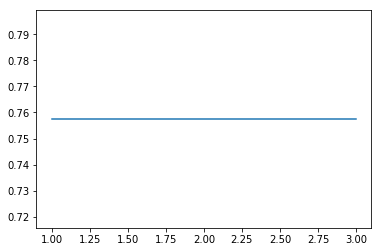

[0.75747059727586485, 0.75747059727586485, 0.75747059727586485]


In [98]:
# for NN: Rescale your data to the bounds of your activation functions.!!!!
# (tanh), rescale to values between -1 and 1. - I did not do this?
# sigmoid activation  rescale your data to values between 0 and 1. 

# WO rescaling the NN accuracy was 58%. XGB 90%, RFC 88%
# Scaling was the problem. MinMaxScaler (0,1) improved from 58% to 83% with (100,) NN
# NN (100,100) was less at 82.6%
# (50,) is same accuracy
# solver sdg 83.5%, adam 83.3%, lbfgs 81%
# activation - 

'''
# cv_scores = []
mod_ = MLPClassifier(hidden_layer_sizes=(50,), learning_rate = 'adaptive', activation='relu', max_iter=500, alpha=0.0001, solver='lbfgs', random_state=1234) 
    
scores = cross_val_score(mod_, X70, y70, cv=10, scoring='accuracy')
cv_scores.append(scores.mean())
print (cv_scores)

'''

kn = ['logistic', 'tanh', 'relu']
cv_scores = []
for k in kn:
    mod_ = MLPClassifier(hidden_layer_sizes=(50,), learning_rate = 'adaptive', activation=k, max_iter=500, alpha=0.0001, solver='adam', random_state=1234) 
    scores = cross_val_score(knn, X70, y70, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

plt.plot([1,2,3], cv_scores)
plt.show()
print (cv_scores)


In [ ]:
# AdaBoost
# n_estimators=50, learning_rate=1.0, 

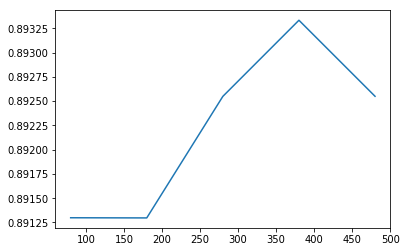

[0.8912986434207802, 0.8912969288906044, 0.8925487630026488, 0.8933328280767936, 0.8925496814462053]


In [13]:
#
kn = range(80,580,100)
cv_scores = []
for k in kn:
    mod_ = AdaBoostClassifier(n_estimators=k)
    scores = cross_val_score(mod_, X70, y70, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

plt.plot(kn, cv_scores)
plt.show()
print (cv_scores)

In [14]:
# Validation 

mod_ = AdaBoostClassifier(n_estimators= 350)
mod_.fit(X70,y70)
score = mod_.score(X30, y30)
print (score)

0.9050575132371736


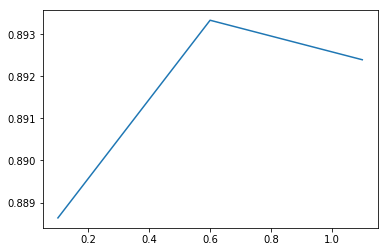

[0.8886358473170042, 0.8933312972736556, 0.8923930032922918]


In [18]:
# learning_rate=1.0

kn = np.arange(0.1, 1.6, 0.5)
cv_scores = []
for k in kn:
    mod_ = AdaBoostClassifier(n_estimators=350, learning_rate=k)
    scores = cross_val_score(mod_, X70, y70, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

plt.plot(kn, cv_scores)
plt.show()
print (cv_scores)


In [19]:
# Validation 

mod_ = AdaBoostClassifier(n_estimators=100, learning_rate= 0.6)
mod_.fit(X70,y70)
score = mod_.score(X30, y30)
print (score)

0.9023187876574768


In [20]:
mod_.fit(X_train,y_train)
ada_train = mod_.predict(X_train)
ada_test = mod_.predict(X_test)

In [1]:
# XGBoost Classfier


In [27]:
import xgboost
from xgboost.sklearn import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.cross_validation import cross_val_score
from sklearn.metrics import accuracy_score

from xgboost import plot_importance
from matplotlib import pyplot
import pprint
%matplotlib inline

//anaconda/envs/New-Py-27/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [16]:
pipeline = Pipeline([('scaler', StandardScaler()), ('classifier', XGBClassifier())])

In [17]:
pipeline

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('classifier', XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1))])

In [ ]:
pipeline.fit(X70.values, y70.values)

In [16]:
# >> I wonder if without scaler the results would be better for XGB 

yp1 = pipeline.predict(X70.values)
accuracy = accuracy_score(y70, y_p1)
print("Accuracy: %.2f%%" % (accuracy * 100.0)) # wow 90%
yp2 = pipeline.predict(X30.values)
accuracy = accuracy_score(y30, y_p1)
print("Accuracy: %.2f%%" % (accuracy * 100.0)) # wow 90%

In [19]:
pipeline.fit(train.values, y_train.values)
y_test = pipeline.predict(test.values)

In [26]:
# y_test = y_test.round()
dfRg = pd.DataFrame(y_test, columns=['is_female'])
result = pd.concat([dfid, dfRg], axis=1, join='inner')

filename = '/Users/VK/Dropbox/_Kaggle/WIDS_Stanford_2018/output/XGBC_Feb21.csv'
result.to_csv(filename,columns = ['test_id','is_female'], index=False, sep=',', encoding='utf-8')

In [ ]:
# Model Stacking


In [21]:
mod_ = DecisionTreeClassifier(max_depth= 7)
mod_.fit(X_train,y_train)
dtc_train = mod_.predict(X_train)
dtc_test = mod_.predict(X_test)


In [22]:
mod_ = SVC(kernel='linear', C=0.025)
mod_.fit(X_train,y_train)
svc_train = mod_.predict(X_train)
svc_test = mod_.predict(X_test)


In [23]:
mod_ = MLPClassifier(hidden_layer_sizes=(100,), learning_rate = 'adaptive', activation='relu', max_iter=500, alpha=0.0001, solver='lbfgs', random_state=1234) 
mod_.fit(X_train,y_train)
mlp_train = mod_.predict(X_train)
mlp_test = mod_.predict(X_test)

In [24]:
mod_ = RandomForestClassifier(n_estimators=350, max_depth=20, max_features=26, random_state=1234)
mod_.fit(X_train,y_train)
rfc_train = mod_.predict(X_train)
rfc_test = mod_.predict(X_test)

In [25]:
mod_ = AdaBoostClassifier(n_estimators=100, learning_rate= 0.6)
mod_.fit(X_train,y_train)
ada_train = mod_.predict(X_train)
ada_test = mod_.predict(X_test)

In [74]:
mod_ = XGBClassifier (max_depth=13, n_estimators=250) # it seeems at 100 results were better
mod_.fit(X_train,y_train)
xgb_train = mod_.predict(X_train)
xgb_test = mod_.predict(X_test)

//anaconda/envs/New-Py-27/lib/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
//anaconda/envs/New-Py-27/lib/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [83]:
# feb23: 
# Lets combine the predictions
# XGB 91.4 + ADABoost 89 + Decision tree + Linear SVM
# try it on train / test to check the accuracy 

# Solve linear function of result combination 

# combine the previous results into 

xgb_train1 = pd.DataFrame(xgb_train)
rfc_train1 = pd.DataFrame(rfc_train)
ada_train1 = pd.DataFrame(ada_train)
dtc_train1 = pd.DataFrame(dtc_train)
rfc_train1 = pd.DataFrame(rfc_train)
mlp_train1 = pd.DataFrame(mlp_train)

XL_train =  pd.concat([xgb_train1, rfc_train1, ada_train1, dtc_train1, rfc_train1, mlp_train1], axis=1)

xgb_test1 = pd.DataFrame(xgb_test)
rfc_test1 = pd.DataFrame(rfc_test)
ada_test1 = pd.DataFrame(ada_test)
dtc_test1 = pd.DataFrame(dtc_test)
rfc_test1 = pd.DataFrame(rfc_test)
mlp_test1 = pd.DataFrame(mlp_test)

XL_test =  pd.concat([xgb_test1, rfc_test1, ada_test1, dtc_test1, rfc_test1, mlp_test1], axis=1)

In [138]:
from sklearn.linear_model import LinearRegression
LRmo = LinearRegression()
LRmo.fit(XL_train, y_train)

score = LRmo.score(XL_train, y_train)
print (score)

1.0


In [139]:
yL_LR = LRmo.predict(XL_train)
yL_LR = yL_LR.round()
accuracy = accuracy_score(y_train, yL_LR)
print("Accuracy: %.2f%%" % (accuracy * 100.0)) # wow 90%

Accuracy: 100.00%


In [140]:
# alternative way - average 

yL_M = XL_train.sum(axis=1)/6
yL_M = yL_M.round()
yL_M = pd.DataFrame(yL_M)

In [141]:
accuracy = accuracy_score(y_train, yL_M)
print("Accuracy: %.2f%%" % (accuracy * 100.0)) # wow 90%

Accuracy: 98.83%


In [ ]:
yL_pred = LRmo.predict(XL_test)
yL_pred = yL_pred.round()
dfR1 = pd.DataFrame(yL_pred, columns=['is_female'])
result = pd.concat([dfid, dfR1], axis=1, join='inner')

filename = '/Users/VK/Dropbox/_Kaggle/WIDS_Stanford_2018/output/StackLin_Feb23.csv'
result.to_csv(filename,columns = ['test_id','is_female'], index=False, sep=',', encoding='utf-8')

In [142]:
# Algo Stacking with NN

cv_scores = []
mod_ = MLPClassifier(hidden_layer_sizes=(50,50,50,25,), learning_rate = 'adaptive', activation='relu', max_iter=500, alpha=0.0001, solver='adam', random_state=1234) 
scores = cross_val_score(mod_, XL_train, y_train, cv=10, scoring='accuracy')
cv_scores.append(scores.mean())
print (cv_scores)


[1.0]


In [143]:
mod_.fit(XL_train, y_train)
yL_NN= mod_.predict(XL_train)

In [148]:
#### Second Level of Stacking

yL_LR = pd.DataFrame(yL_LR)
yL_M = pd.DataFrame(yL_M)
yL_NN = pd.DataFrame(yL_NN)
yL_m = pd.concat([yL_LR, yL_M, yL_NN], axis=1)

yL2 = yL_m.sum(axis=1)/3
yL2 = yL2.round()
yL2 = pd.DataFrame(yL2)


In [149]:
accuracy = accuracy_score(yL2, y_train)
print("Accuracy: %.2f%%" % (accuracy * 100.0)) # wow 90%

Accuracy: 100.00%


In [ ]:
##################   THE END ######


In [68]:
# FIRST: Grid Search of Random Forest

# I tried Grid Search, but found the one feature optimization was better - much faster and flexible -
# try 3-4 values & find the local maximum

parameters = {"max_depth": [2,3,4,5,6,7,8,9,10,11,12]
            ,"min_samples_split" :[2,3,4,5,6]
            ,"n_estimators" : [10]  # increase?
            ,"min_samples_leaf": [1,2,3,4,5]
            ,"max_features": (4,5,6,"sqrt")
            ,"criterion": ('gini','entropy')}
rfce = RandomForestClassifier()
model = GridSearchCV(rfce, parameters)
model_fit = model.fit(X70,y70)

learned_parameters = model_fit.best_params_  # Extract best params



In [69]:
rfc = RandomForestClassifier(max_depth = learned_parameters["max_depth"]
                            ,max_features = learned_parameters['max_features']
                            ,min_samples_leaf = learned_parameters['min_samples_leaf']
                            ,min_samples_split = learned_parameters['min_samples_split']
                            ,criterion = learned_parameters['criterion']
                            ,n_estimators = 5000)
model2 = rfc.fit(X70,y70)

In [ ]:
ym2 = model2.predict(X70)
print ('Train  err', np.sqrt ( np.sum( np.square(y70-ym2))/len(y70))  )  # 
ym2 = m_LR.predict(X30)
print ('Validation  err', np.sqrt ( np.sum( np.square(y30-ym2))/len(y30))  )  # 

In [ ]:
# >>> save model and parameters for rfc & model2 <<<<

In [1]:
print (rfc)

NameError: name 'rfc' is not defined

In [ ]:
# SECOND: GridSearch of Random Forest

from sklearn.grid_search import GridSearchCV

# feb22:
# use logic to set the range of possible values of each hyperparameter
# additional ideas: verbose, oob, boostrap, 

parameters = {"max_depth": [11,13,21,31,41,51,61]  # could be used for regularization
            ,"min_samples_split" :[2,4,6,8,10,12,15] # was 6
            ,"n_estimators" : [50, 150, 250, 350, 450, 500]  # was 10, at 500 it was overfitting with 0 error. at 10 it was .87 accuracy.
            ,"min_samples_leaf": [1,2,3,4,5,6,7]  # was 2
            ,"max_features": (4,8,12,"sqrt",20,30,50)
            ,"criterion": ('gini','entropy')}
rfce = RandomForestClassifier()

#feb22: I have added n_jobs = 3, cv = 10 - could be cv = 10 is better.

model = GridSearchCV(rfce, parameters, n_jobs = 3, cv = 10)
model_fit = model.fit(X70,y70)

learned_parameters = model_fit.best_params_  # Extract best params

print("Best score: %s" % (model_fit.best_score_)) 
# Best score: 
print (model_fit.best_params_) 
# 
